In [90]:

# # https://www.kaggle.com/datasets/steve1215rogg/tech-support-conversations-dataset/data
# # https://www.kaggle.com/steve1215rogg/tech-support-conversations-dataset
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [72]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for making plots
import seaborn as sns   # for making plots with seaborn
import numpy as np # for data manipulation
import plotly.express as px # for making plots
from wordcloud import WordCloud, STOPWORDS  # for making word cloud
from collections import Counter # for counting the values
import warnings # for ignoring the warnings

df = pd.read_csv('tech_support_dataset.csv', header = 0) # read the data from the csv file

print(df) # print the data frame
df.head() # print the first 5 rows of the data frame

     Conversation_ID                 Customer_Issue  \
0          CONV-0001        Cannot connect to Wi-Fi   
1          CONV-0002  Software installation failure   
2          CONV-0003        Cannot connect to Wi-Fi   
3          CONV-0004                Forgot password   
4          CONV-0005  Software installation failure   
...              ...                            ...   
1891       CONV-1892                Forgot password   
1892       CONV-1893  Software installation failure   
1893       CONV-1894                Forgot password   
1894       CONV-1895              Blue screen error   
1895       CONV-1896         Unable to access email   

                                     Tech_Response Resolution_Time  \
0     Clear cache and remove unnecessary programs.      92 minutes   
1                   Reinstall the printer drivers.      76 minutes   
2     Clear cache and remove unnecessary programs.      50 minutes   
3     Reset your password using the link provided.      97 

,Conversation_ID,Customer_Issue,Tech_Response,Resolution_Time,Issue_Category,Issue_Status
0,CONV-0001,Cannot connect to Wi-Fi,Clear cache and remove unnecessary programs.,92 minutes,Software,Pending
1,CONV-0002,Software installation failure,Reinstall the printer drivers.,76 minutes,Account,Pending
2,CONV-0003,Cannot connect to Wi-Fi,Clear cache and remove unnecessary programs.,50 minutes,Network,Resolved
3,CONV-0004,Forgot password,Reset your password using the link provided.,97 minutes,Performance,Pending
4,CONV-0005,Software installation failure,Follow the software installation guide.,110 minutes,Performance,Pending


In [73]:
print(f"Dataset Shape: {df.shape}") # print the shape of the data frame
print(f"Columns in the dataset: {df.columns}") # print the columns in the data frame

# Summary statistics
df.describe(include='all') # summary statistics for all columns

Dataset Shape: (1896, 6)
Columns in the dataset: Index(['Conversation_ID', 'Customer_Issue', 'Tech_Response', 'Resolution_Time',
       'Issue_Category', 'Issue_Status'],
      dtype='object')


,Conversation_ID,Customer_Issue,Tech_Response,Resolution_Time,Issue_Category,Issue_Status
count,1896,1896,1896,1896,1896,1896
unique,1896,7,7,116,5,4
top,CONV-0001,Slow system performance,Verify your email settings.,56 minutes,Hardware,Resolved
freq,1,293,285,26,402,505


In [74]:
missing_values = df.isnull().sum() # check for missing values
print(f"Missing values:\n{missing_values}") # print missing values

Missing values:
Conversation_ID    0
Customer_Issue     0
Tech_Response      0
Resolution_Time    0
Issue_Category     0
Issue_Status       0
dtype: int64


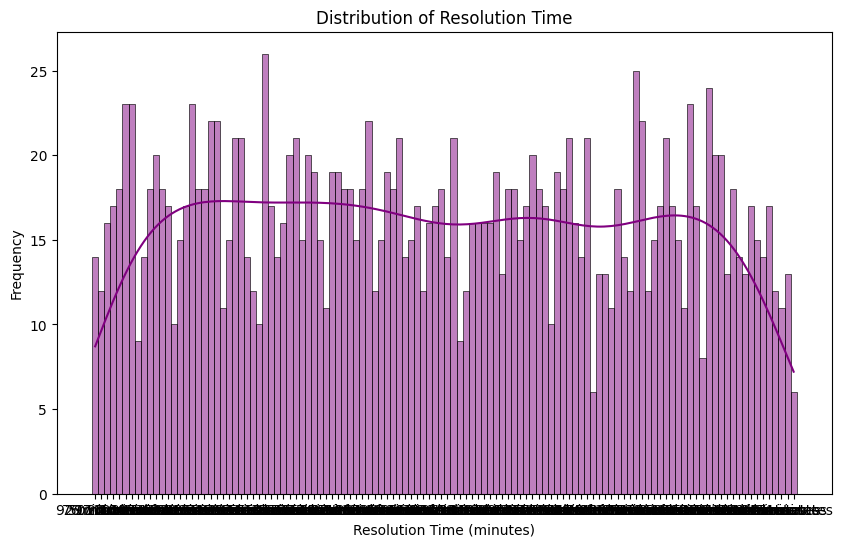

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Resolution_Time'], bins=30, kde=True, color='purple')
plt.title('Distribution of Resolution Time')
plt.xlabel('Resolution Time (minutes)')
plt.ylabel('Frequency')
plt.show()

In [76]:
numeric_df = df.select_dtypes(include=[np.number])
if len(numeric_df.columns) >= 4:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
    plt.title('Correlation Heatmap')
    plt.show()

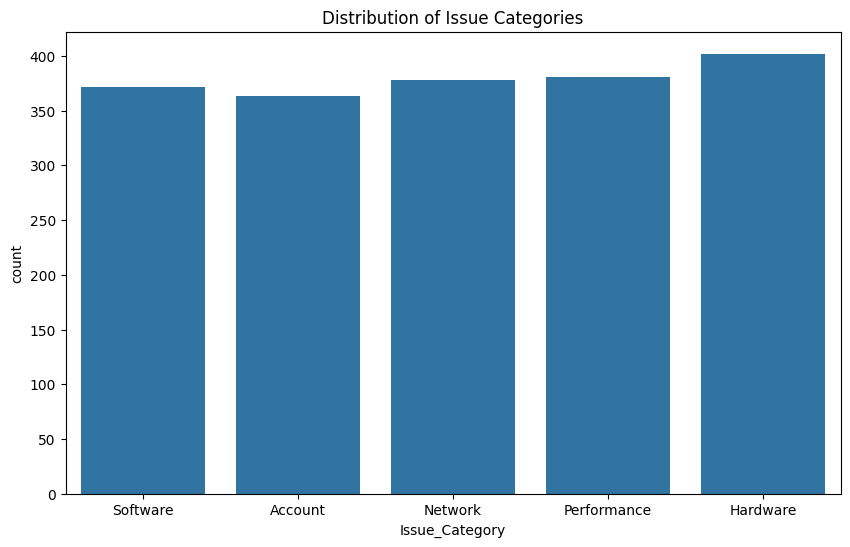

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Issue_Category', data=df)
plt.title('Distribution of Issue Categories')
plt.show()

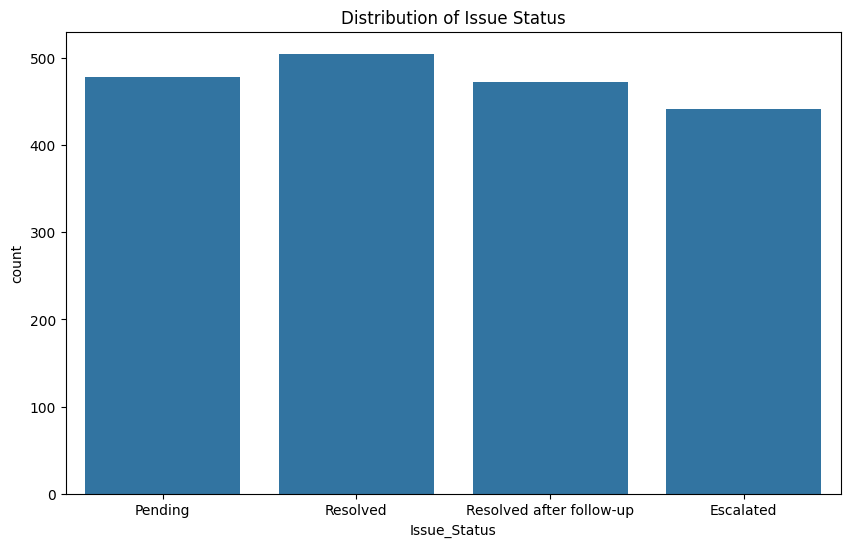

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Issue_Status', data=df)
plt.title('Distribution of Issue Status')
plt.show()

In [79]:
from sklearn.feature_extraction.text import CountVectorizer # for converting text to vectors

# Example: Remove stopwords and convert text to lowercase
vectorizer = CountVectorizer(stop_words='english', lowercase=True, max_features=500) # only top 500 words
X = vectorizer.fit_transform(df['Customer_Issue']) # fit and transform the text

# Display feature names
print(f"Feature names from vectorization: {vectorizer.get_feature_names_out()[:10]}") # print the feature names

Feature names from vectorization: ['access' 'blue' 'connect' 'email' 'error' 'failure' 'fi' 'forgot'
 'installation' 'password']


In [80]:
from sklearn.model_selection import train_test_split

# Example: Splitting the data for classification (using 'Issue_Category' as the target)
X = vectorizer.transform(df['Customer_Issue'])  # Features (vectorized text)
y = df['Issue_Category']  # Target column

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split the data

print(f"Training data shape: {X_train.shape}") # print the shape of the training data
print(f"Test data shape: {X_test.shape}") # print the shape of the test data

Training data shape: (1516, 18)
Test data shape: (380, 18)


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = LogisticRegression(max_iter=1000) # Increase max_iter for convergence

# Train the model
model.fit(X_train, y_train) # fit the model

# Predict on test data
y_pred = model.predict(X_test) # predict the test data

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")    # print the accuracy
print(f"Classification Report:\n{classification_report(y_test, y_pred)}") # print the classification report

Accuracy: 0.2
Classification Report:
              precision    recall  f1-score   support

     Account       0.21      0.36      0.26        61
    Hardware       0.18      0.39      0.25        74
     Network       0.24      0.17      0.20        78
 Performance       0.19      0.14      0.16        86
    Software       0.00      0.00      0.00        81

    accuracy                           0.20       380
   macro avg       0.16      0.21      0.17       380
weighted avg       0.16      0.20      0.17       380



/Users/abdallahel-daly/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abdallahel-daly/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abdallahel-daly/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

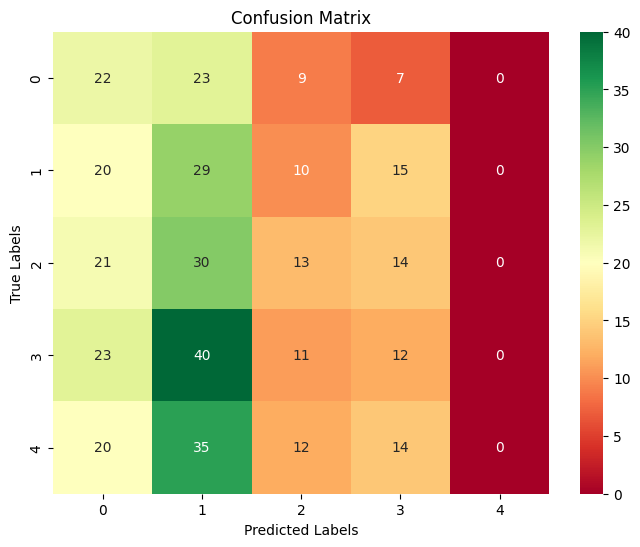

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)  # Rows = actual labels, columns = predicted labels

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(cm, annot=True, cmap='RdYlGn', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<Axes: >

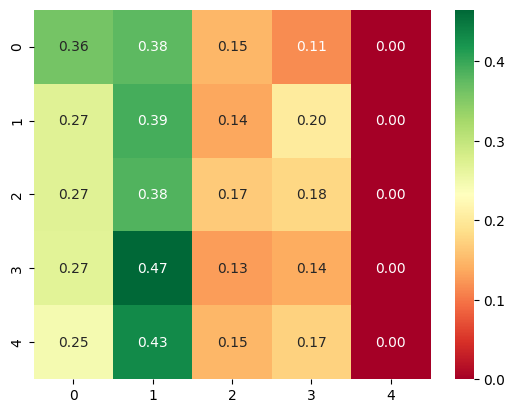

In [87]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='RdYlGn')